In [4]:
import quandl

In [2]:
import nsetools

In [99]:
from backtest import Strategy, Portfolio

ModuleNotFoundError: No module named 'backtest'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [12]:
bajaj_auto = quandl.get("XNSE/BAJAJ_AUTO", authtoken="ZTXJC6Sw61spiFCUh1CM")

In [8]:
bajaj_auto = bajaj_auto

In [18]:
bajaj_auto.tail()

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2018-12-25,2550.461719,2550.461719,2550.461719,2550.461719,0.0,NaN,NaN
2018-12-26,2540.211758,2574.003867,2499.305522,2559.775610,410582.0,NaN,NaN
2018-12-27,2587.202446,2587.296053,2524.204970,2562.022177,558049.0,NaN,NaN
2018-12-28,2577.841751,2583.504972,2538.386423,2543.768822,358369.0,NaN,NaN
2018-12-31,2562.958247,2586.359984,2536.748301,2546.249406,406069.0,NaN,NaN


In [29]:
# Calculating the short-window simple moving average
short_rolling = bajaj_auto.rolling(window=20).mean()
short_rolling.head(20)

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Calculating the long-window simple moving average
long_rolling = bajaj_auto.rolling(window=50).mean()
long_rolling.tail()

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2018-12-25,2506.441179,2534.781619,2474.589543,2505.667050,377766.66,NaN,NaN
2018-12-26,2507.858389,2536.656566,2477.060767,2509.164206,380275.98,NaN,NaN
2018-12-27,2511.904081,2540.704131,2479.846509,2512.706293,391436.96,NaN,NaN
2018-12-28,2515.997513,2544.768544,2484.185191,2516.586301,389200.90,NaN,NaN
2018-12-31,2519.889690,2548.293782,2488.178464,2519.642567,390893.24,NaN,NaN


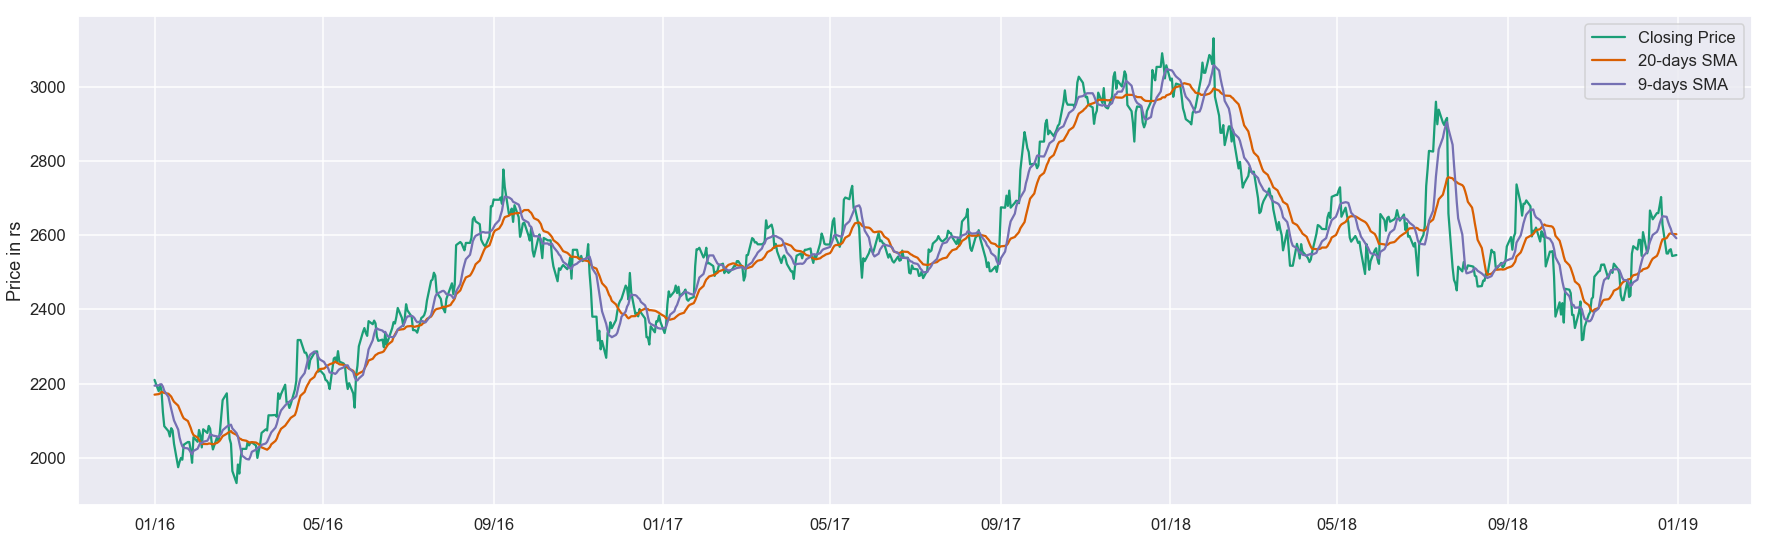

In [28]:
start_date = '2016-01-01'
end_date = '2018-12-31'

fig, ax = plt.subplots(figsize=(30,9))

ax.plot(bajaj_auto.loc[start_date:end_date, :].index, bajaj_auto.loc[start_date:end_date, 'Close'], label='Closing Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '9-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in rs')
ax.xaxis.set_major_formatter(my_year_month_fmt)

### With EMA

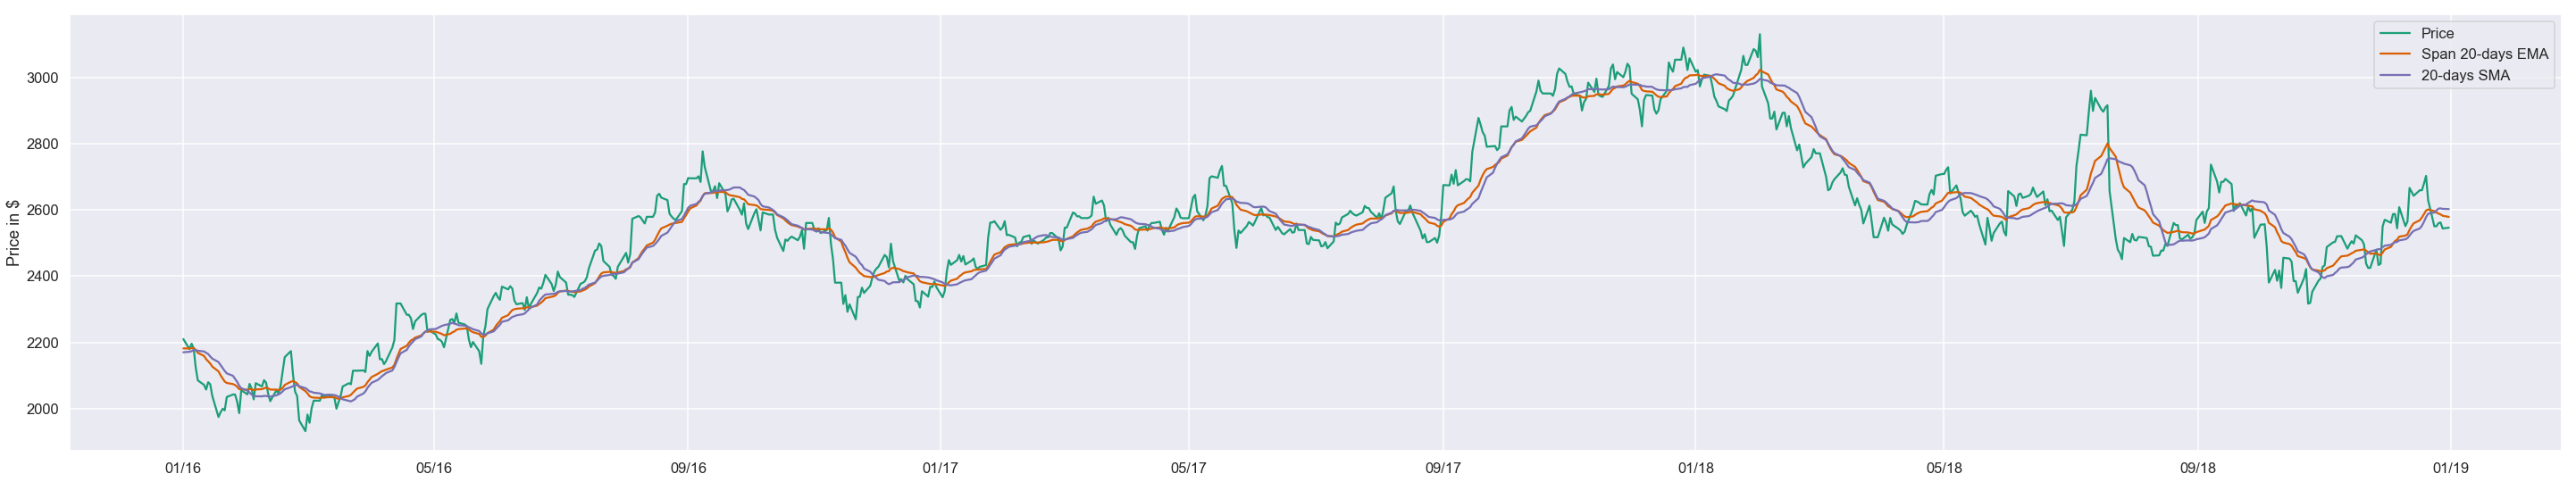

In [31]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = bajaj_auto.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(50,9))

ax.plot(bajaj_auto.loc[start_date:end_date, :].index, bajaj_auto.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

### Strategy - 
1. when price crosses above 20 period ema from below then long
2. when price falls below 20 period ema then short

In [34]:
trading_positions_raw = bajaj_auto - ema_short
trading_positions_raw.tail()

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2018-12-25,-47.253645,-74.465605,-14.896820,-41.461672,-342946.514764,NaN,NaN
2018-12-26,-52.027072,-46.073604,-59.762254,-29.086087,61194.010452,NaN,NaN
2018-12-27,-4.556729,-29.659378,-31.542538,-24.283376,188788.533266,NaN,NaN
2018-12-28,-12.591955,-30.264701,-15.707649,-38.485613,-9854.184188,NaN,NaN
2018-12-31,-24.858748,-24.799242,-15.693793,-32.575979,34241.452401,NaN,NaN


In [35]:
trading_positions = trading_positions_raw.apply(np.sign) * 1
trading_positions.tail()

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2018-12-25,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN
2018-12-26,-1.0,-1.0,-1.0,-1.0,1.0,NaN,NaN
2018-12-27,-1.0,-1.0,-1.0,-1.0,1.0,NaN,NaN
2018-12-28,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN
2018-12-31,-1.0,-1.0,-1.0,-1.0,1.0,NaN,NaN


In [36]:
trading_positions_final = trading_positions.shift(1)

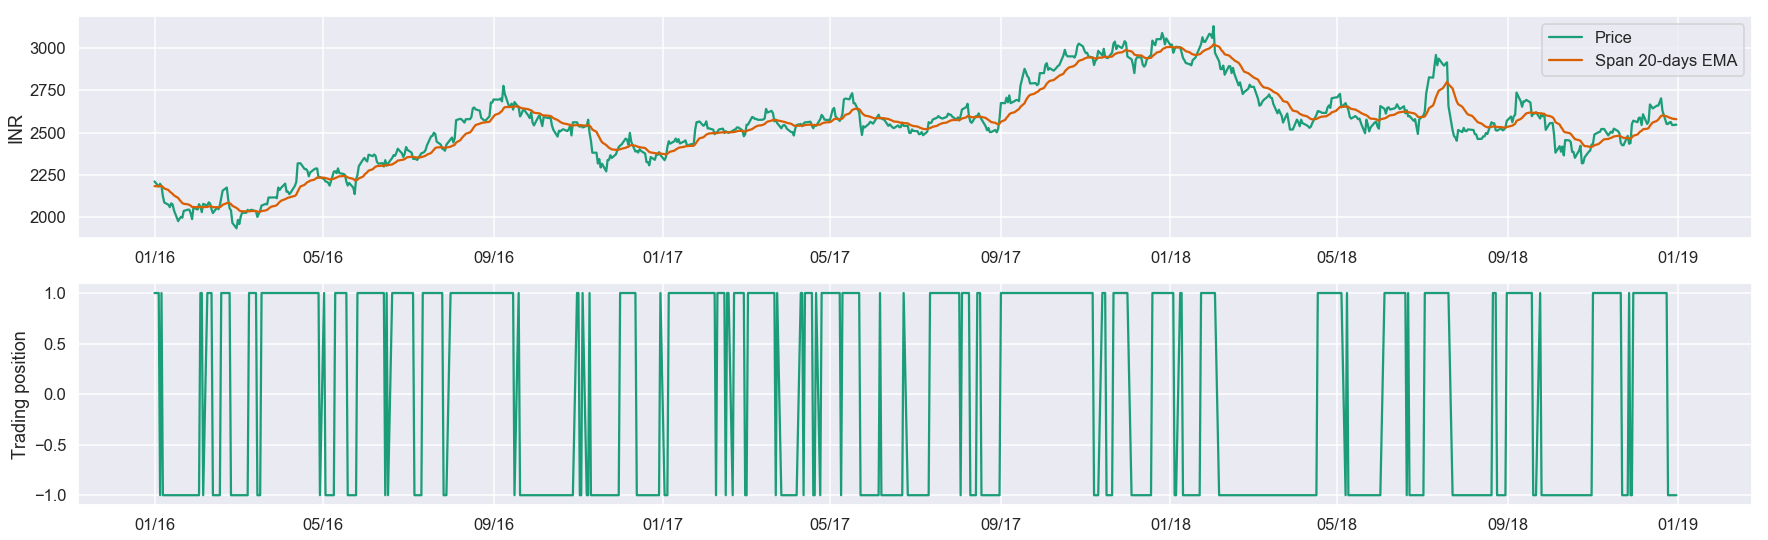

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,9))

ax1.plot(bajaj_auto.loc[start_date:end_date, :].index, bajaj_auto.loc[start_date:end_date, 'Close'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 20-days EMA')

ax1.set_ylabel('INR')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'Close'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [40]:
asset_log_returns = np.log(bajaj_auto).diff()
asset_log_returns.head()

C:\Users\a400491\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.005796,0.010290,-0.017099,-0.013049,inf,NaN,NaN
2010-01-05,-0.009221,-0.008952,-0.008763,0.004608,0.195614,NaN,NaN
2010-01-06,0.000686,-0.004077,-0.002840,-0.015580,0.004074,NaN,NaN
2010-01-07,-0.015549,-0.012073,-0.017780,-0.017696,-0.346892,NaN,NaN


In [41]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2018-12-25,-0.036345,-0.038890,-0.003235,-0.000000,inf,NaN,NaN
2018-12-26,0.004027,-0.009188,0.020262,-0.003645,-inf,NaN,NaN
2018-12-27,-0.018330,-0.005151,-0.009913,-0.000877,0.306871,NaN,NaN
2018-12-28,0.003625,0.001466,-0.005602,0.007150,-0.442884,NaN,NaN
2018-12-31,0.005790,-0.001104,0.000646,-0.000975,-0.124960,NaN,NaN


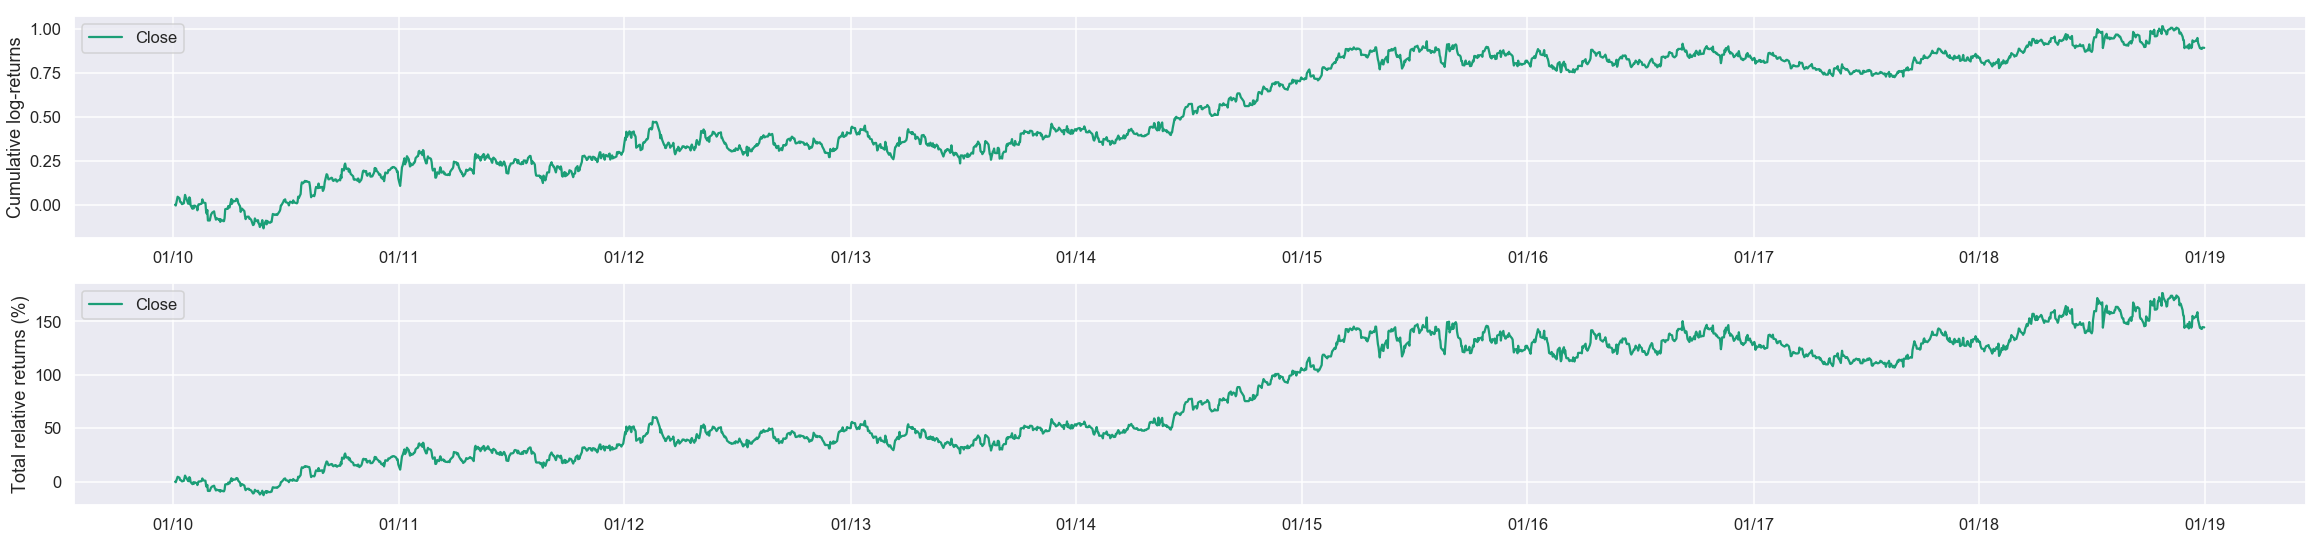

In [44]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(40,9))

for c in asset_log_returns[['Close']]:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns[['Close']]:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

### EMA cross over strategy

### Strategy - 
1.Long when the 9 day ema crosse above 20 day ema
2. Short when 9 ema crosses below 20 day ema

In [64]:
ema_short_9 = bajaj_auto[['Close']].ewm(span=9, adjust=False).mean()
ema_short_9

,Close
Date,
2010-01-01,669.844609
2010-01-04,668.107777
2010-01-05,667.329065
2010-01-06,664.652435
2010-01-07,660.216986
2010-01-08,654.542438
2010-01-11,651.094524
2010-01-12,650.943348
2010-01-13,651.120151


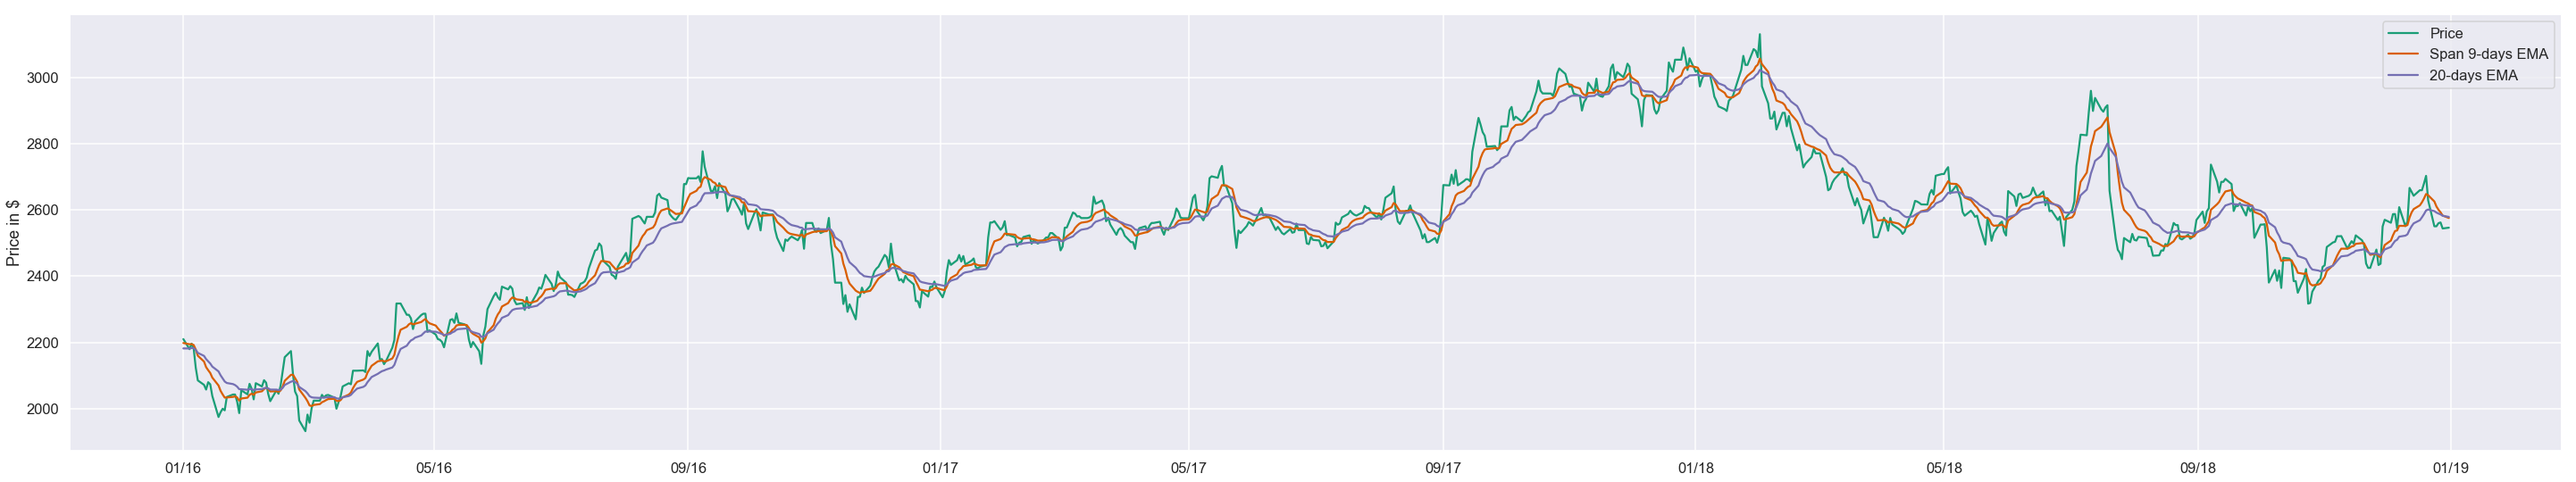

In [54]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short_9 = bajaj_auto[['Close']].ewm(span=9, adjust=False).mean()
ema_short_20 = bajaj_auto[['Close']].ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(50,9))

ax.plot(bajaj_auto.loc[start_date:end_date, :].index, bajaj_auto.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(ema_short_9.loc[start_date:end_date, :].index, ema_short_9.loc[start_date:end_date, 'Close'], label = 'Span 9-days EMA')
ax.plot(ema_short_20.loc[start_date:end_date, :].index, ema_short_20.loc[start_date:end_date, 'Close'], label = '20-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [55]:
trading_positions_raw = ema_short_9 - ema_short_20
trading_positions_raw.tail()

,Close
Date,
2018-12-25,18.487025
2018-12-26,11.421757
2018-12-27,6.325647
2018-12-28,0.604288
2018-12-31,-3.288525


In [56]:
trading_positions = trading_positions_raw.apply(np.sign) * 1
trading_positions.tail()

,Close
Date,
2018-12-25,1.0
2018-12-26,1.0
2018-12-27,1.0
2018-12-28,1.0
2018-12-31,-1.0


In [58]:
trading_positions_final = trading_positions.shift(1)

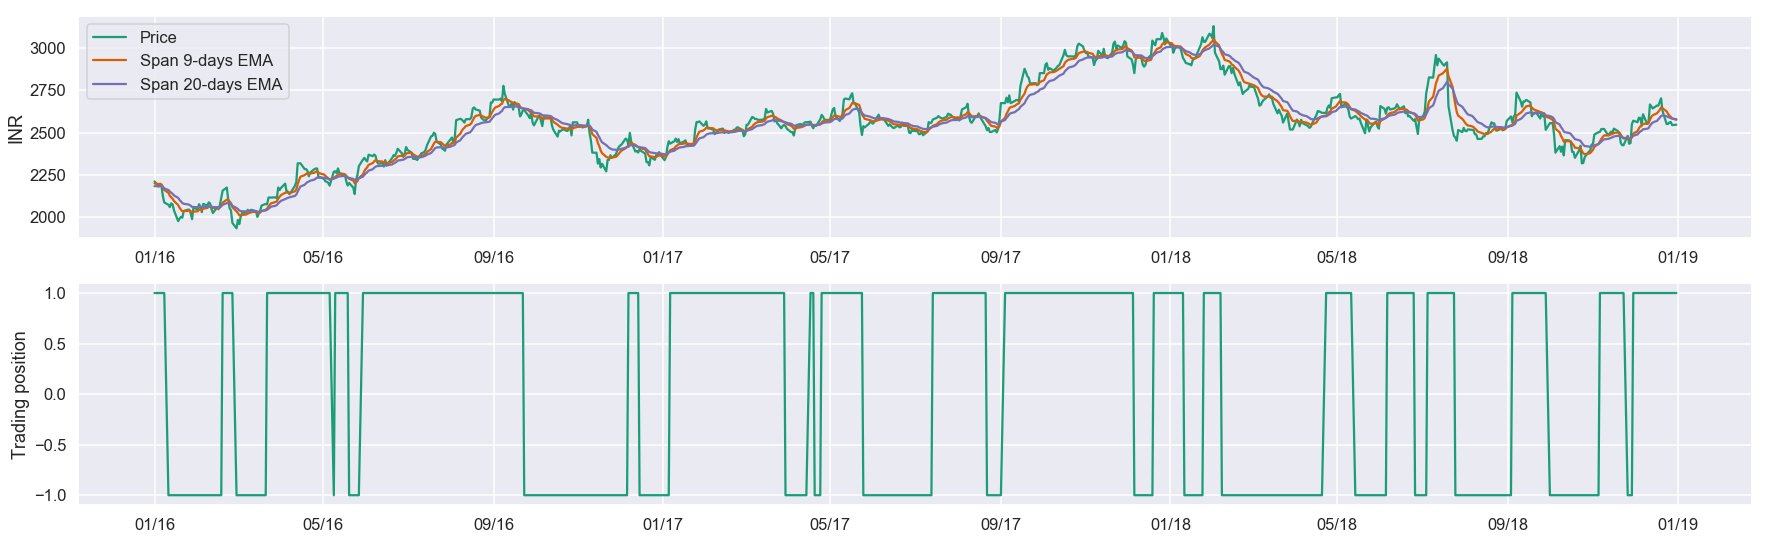

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,9))

ax1.plot(bajaj_auto.loc[start_date:end_date, :].index, bajaj_auto.loc[start_date:end_date, 'Close'], label='Price')
ax1.plot(ema_short_9.loc[start_date:end_date, :].index, ema_short_9.loc[start_date:end_date, 'Close'], label = 'Span 9-days EMA')
ax1.plot(ema_short_20.loc[start_date:end_date, :].index, ema_short_20.loc[start_date:end_date, 'Close'], label = 'Span 20-days EMA')

ax1.set_ylabel('INR')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'Close'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [60]:
asset_log_returns = np.log(bajaj_auto).diff()
asset_log_returns.head()

C:\Users\a400491\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.005796,0.010290,-0.017099,-0.013049,inf,NaN,NaN
2010-01-05,-0.009221,-0.008952,-0.008763,0.004608,0.195614,NaN,NaN
2010-01-06,0.000686,-0.004077,-0.002840,-0.015580,0.004074,NaN,NaN
2010-01-07,-0.015549,-0.012073,-0.017780,-0.017696,-0.346892,NaN,NaN


In [61]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,Adjustment Factor,Adjustment Type,Close,High,Low,Open,Volume
Date,,,,,,,
2018-12-25,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,0.003645,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,0.000877,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,-0.007150,NaN,NaN,NaN,NaN
2018-12-31,NaN,NaN,0.000975,NaN,NaN,NaN,NaN


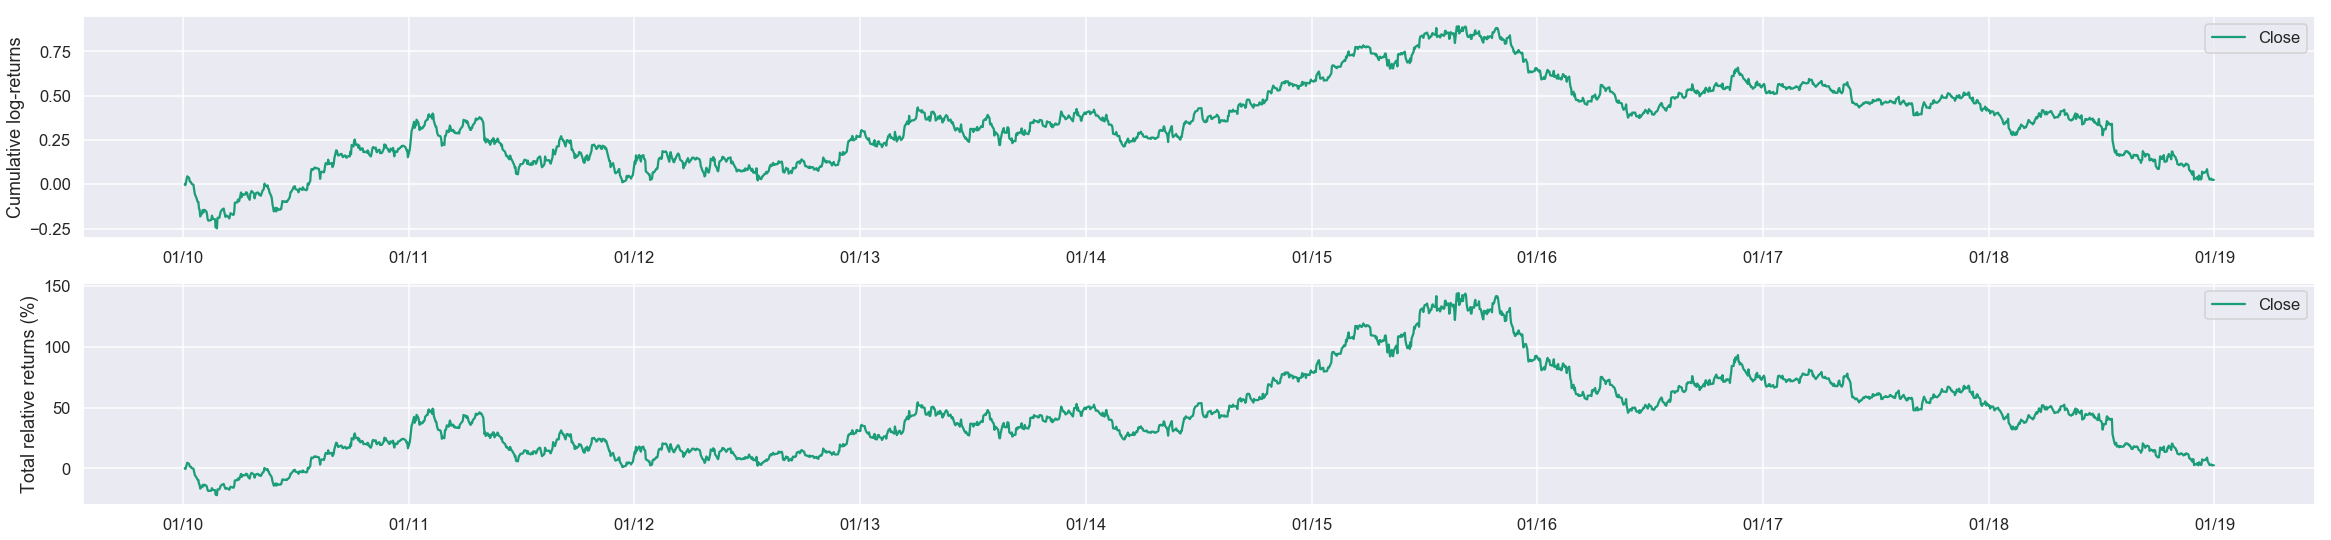

In [62]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(40,9))

for c in asset_log_returns[['Close']]:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns[['Close']]:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [ ]:
### Joining pandas dataframe 

In [68]:
ema_short_9.columns = ['ema_9_closing']

In [76]:
ema_short_20.columns = ['ema_20_closing']

In [77]:
bajaj_auto1 = pd.concat([bajaj_auto,ema_short_9,ema_short_20], axis=1 )

In [79]:
bajaj_auto1['trading_positions_raw'] = bajaj_auto1['ema_9_closing'] - bajaj_auto1['ema_20_closing'] 

In [81]:
bajaj_auto1['trading_position_signal'] = bajaj_auto1['trading_positions_raw'].apply(np.sign) * 1

In [82]:
bajaj_auto1

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type,ema_9_closing,ema_20_closing,trading_positions_raw,trading_position_signal
Date,,,,,,,,,,,
2010-01-01,669.844609,669.844609,669.844609,669.844609,0.0,NaN,NaN,669.844609,669.844609,0.000000,0.0
2010-01-04,673.738166,676.772851,658.488399,661.160448,381510.0,NaN,NaN,668.107777,669.017546,-0.909769,-1.0
2010-01-05,667.554280,670.741654,652.743492,664.214219,463938.0,NaN,NaN,667.329065,668.560086,-1.231021,-1.0
2010-01-06,668.012346,668.012346,650.892144,653.945915,465832.0,NaN,NaN,664.652435,667.168260,-2.515825,-1.0
2010-01-07,657.705870,659.996198,639.421418,642.475188,329288.0,NaN,NaN,660.216986,664.816539,-4.599554,-1.0
2010-01-08,642.856910,648.869021,626.042085,631.844249,365802.0,NaN,NaN,654.542438,661.676321,-7.133883,-1.0
2010-01-11,634.802589,641.215508,626.022999,637.302864,404664.0,NaN,NaN,651.094524,659.355040,-8.260516,-1.0
2010-01-12,646.635951,656.121726,639.822225,650.338648,846940.0,NaN,NaN,650.943348,658.496336,-7.552987,-1.0
2010-01-13,658.469313,667.038957,640.547496,651.827361,1135900.0,NaN,NaN,651.120151,657.861195,-6.741044,-1.0


In [89]:
bajaj_auto1['trading_position_signal'] = bajaj_auto1.trading_position_signal.replace(-1,0)

In [90]:
bajaj_auto1

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type,ema_9_closing,ema_20_closing,trading_positions_raw,trading_position_signal
Date,,,,,,,,,,,
2010-01-01,669.844609,669.844609,669.844609,669.844609,0.0,NaN,NaN,669.844609,669.844609,0.000000,0.0
2010-01-04,673.738166,676.772851,658.488399,661.160448,381510.0,NaN,NaN,668.107777,669.017546,-0.909769,0.0
2010-01-05,667.554280,670.741654,652.743492,664.214219,463938.0,NaN,NaN,667.329065,668.560086,-1.231021,0.0
2010-01-06,668.012346,668.012346,650.892144,653.945915,465832.0,NaN,NaN,664.652435,667.168260,-2.515825,0.0
2010-01-07,657.705870,659.996198,639.421418,642.475188,329288.0,NaN,NaN,660.216986,664.816539,-4.599554,0.0
2010-01-08,642.856910,648.869021,626.042085,631.844249,365802.0,NaN,NaN,654.542438,661.676321,-7.133883,0.0
2010-01-11,634.802589,641.215508,626.022999,637.302864,404664.0,NaN,NaN,651.094524,659.355040,-8.260516,0.0
2010-01-12,646.635951,656.121726,639.822225,650.338648,846940.0,NaN,NaN,650.943348,658.496336,-7.552987,0.0
2010-01-13,658.469313,667.038957,640.547496,651.827361,1135900.0,NaN,NaN,651.120151,657.861195,-6.741044,0.0


In [94]:
# Shift dataframe back 1 period by rows
df2 = bajaj_auto1[['trading_position_signal']].shift(periods=-1, axis=0)
df2.columns = ['trading_position_signal_n']

In [95]:
bajaj_auto1 = pd.concat([bajaj_auto1, df2], axis=1)

In [96]:
bajaj_auto1

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type,ema_9_closing,ema_20_closing,trading_positions_raw,trading_position_signal,trading_position_signal_n
Date,,,,,,,,,,,,
2010-01-01,669.844609,669.844609,669.844609,669.844609,0.0,NaN,NaN,669.844609,669.844609,0.000000,0.0,0.0
2010-01-04,673.738166,676.772851,658.488399,661.160448,381510.0,NaN,NaN,668.107777,669.017546,-0.909769,0.0,0.0
2010-01-05,667.554280,670.741654,652.743492,664.214219,463938.0,NaN,NaN,667.329065,668.560086,-1.231021,0.0,0.0
2010-01-06,668.012346,668.012346,650.892144,653.945915,465832.0,NaN,NaN,664.652435,667.168260,-2.515825,0.0,0.0
2010-01-07,657.705870,659.996198,639.421418,642.475188,329288.0,NaN,NaN,660.216986,664.816539,-4.599554,0.0,0.0
2010-01-08,642.856910,648.869021,626.042085,631.844249,365802.0,NaN,NaN,654.542438,661.676321,-7.133883,0.0,0.0
2010-01-11,634.802589,641.215508,626.022999,637.302864,404664.0,NaN,NaN,651.094524,659.355040,-8.260516,0.0,0.0
2010-01-12,646.635951,656.121726,639.822225,650.338648,846940.0,NaN,NaN,650.943348,658.496336,-7.552987,0.0,0.0
2010-01-13,658.469313,667.038957,640.547496,651.827361,1135900.0,NaN,NaN,651.120151,657.861195,-6.741044,0.0,0.0


In [97]:
bajaj_auto1['condition'] = bajaj_auto1['trading_position_signal_n'] - bajaj_auto1['trading_position_signal']

In [98]:
bajaj_auto1

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type,ema_9_closing,ema_20_closing,trading_positions_raw,trading_position_signal,trading_position_signal_n,condition
Date,,,,,,,,,,,,,
2010-01-01,669.844609,669.844609,669.844609,669.844609,0.0,NaN,NaN,669.844609,669.844609,0.000000,0.0,0.0,0.0
2010-01-04,673.738166,676.772851,658.488399,661.160448,381510.0,NaN,NaN,668.107777,669.017546,-0.909769,0.0,0.0,0.0
2010-01-05,667.554280,670.741654,652.743492,664.214219,463938.0,NaN,NaN,667.329065,668.560086,-1.231021,0.0,0.0,0.0
2010-01-06,668.012346,668.012346,650.892144,653.945915,465832.0,NaN,NaN,664.652435,667.168260,-2.515825,0.0,0.0,0.0
2010-01-07,657.705870,659.996198,639.421418,642.475188,329288.0,NaN,NaN,660.216986,664.816539,-4.599554,0.0,0.0,0.0
2010-01-08,642.856910,648.869021,626.042085,631.844249,365802.0,NaN,NaN,654.542438,661.676321,-7.133883,0.0,0.0,0.0
2010-01-11,634.802589,641.215508,626.022999,637.302864,404664.0,NaN,NaN,651.094524,659.355040,-8.260516,0.0,0.0,0.0
2010-01-12,646.635951,656.121726,639.822225,650.338648,846940.0,NaN,NaN,650.943348,658.496336,-7.552987,0.0,0.0,0.0
2010-01-13,658.469313,667.038957,640.547496,651.827361,1135900.0,NaN,NaN,651.120151,657.861195,-6.741044,0.0,0.0,0.0
